In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

def load_json(folder_name):
    with open(os.path.join("../results", "sacred", str(folder_name), "info.json")) as f:
        data = json.load(f)
    return data

# tableu-style colors
# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

def plot_actor_loss(folder_name, length=None):
    data = load_json(folder_name)
    actor_loss = data['coma_loss']
    episode = data['episode']
    if not length:
        length = min(len(actor_loss), len(episode))
    max_loss = np.max(np.abs(actor_loss))
    plt.figure(figsize=(12, 14))

# Remove the plot frame lines. They are unnecessary chartjunk.
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


    plt.plot(np.arange(length), actor_loss[:length], color=tableau20[0])
    plt.plot(np.arange(length), np.zeros(length), linestyle='dotted', color=tableau20[12])
    plt.xticks(np.arange(length, step=10), np.array(episode[:length])[np.arange(length, step=10)])
    plt.xlabel('Episodes')
    plt.ylabel('Actor Loss')
    plt.show()


def plot_critic_loss(folder_name, length=None):
    data = load_json(folder_name)
    critic_loss = data['critic_loss']
    episode = data['episode']
    if not length:
        length = min(len(critic_loss), len(episode))
    max_loss = np.max(np.abs(critic_loss))
    plt.figure(figsize=(12, 14))

# Remove the plot frame lines. They are unnecessary chartjunk.
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


    plt.plot(np.arange(length), critic_loss[:length], color=tableau20[0])
    plt.xticks(np.arange(length, step=10), np.array(episode[:length])[np.arange(length, step=10)])
    plt.xlabel('Episodes')
    plt.ylabel('Critic Loss')
    plt.show()


def plot_q_loss(folder_names, alg_names, length=None):
    losses = []
    episodes = []
    for folder_name in folder_names:
        data = load_json(folder_name)
        loss = data['loss']
        episode = data['episode']
        losses.append(loss)
        episodes.append(episode)

    if not length:
        length_e = min([len(episode) for episode in episodes])
        length_l = min([len(loss) for loss in losses])
        length = min(length_e, length_l)
    max_loss = np.max(np.abs(loss))
    plt.figure(figsize=(12, 14))

# Remove the plot frame lines. They are unnecessary chartjunk.
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    for i in range(len(losses)):
        plt.plot(np.arange(length), losses[i][:length], color=tableau20[i], label=alg_names[i])
    plt.legend()
    plt.xticks(np.arange(length, step=10), np.array(episode[:length])[np.arange(length, step=10)])
    plt.xlabel('Episodes')
    plt.ylabel('Q Loss')
    plt.show()


def plot_train_profit(folder_names, alg_names, length=None):
    profit_means = []
    episodes = []
    for folder_name in folder_names:
        data = load_json(folder_name)
        profit_mean = list(map(lambda x:x['value'], data['profit_mean']))
        episode = data['episode']
        profit_means.append(profit_mean)
        episodes.append(episode)

    if not length:
        length_e = min([len(episode) for episode in episodes])
        length_p = min([len(profit_mean) for profit_mean in profit_means])
        length = min(length_e, length_p)

    plt.figure(figsize=(12, 14))

# Remove the plot frame lines. They are unnecessary chartjunk.
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    for i in range(len(profit_means)):
        plt.plot(np.arange(length), profit_means[i][:length], color=tableau20[i*2], label=alg_names[i])
    plt.legend()
    plt.xticks(np.arange(length, step=50), np.array(episode[:length])[np.arange(length, step=10)])
    plt.xlabel('Episodes')
    plt.ylabel('Average Profit')
    plt.show()


def plot_test_profit(folder_names, alg_names, length=None):
    test_profit_means = []
    episodes = []
    for folder_name in folder_names:
        data = load_json(folder_name)
        test_profit_mean = list(map(lambda x:x['value'], data['test_profit_mean']))
        episode = data['episode']
        test_profit_means.append(test_profit_mean)
        episodes.append(episode)

    if not length:
        length_e = min([len(episode) for episode in episodes])
        length_p = min([len(test_profit_mean) for test_profit_mean in test_profit_means])
        length = min(length_e, length_p)

    plt.figure(figsize=(12, 14))

# Remove the plot frame lines. They are unnecessary chartjunk.
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    for i in range(len(test_profit_means)):
        plt.plot(np.arange(length), test_profit_means[i][:length], color=tableau20[i*2], label=alg_names[i])
    plt.legend()
    plt.xticks(np.arange(length, step=50), np.array(episode[:length])[np.arange(length, step=10)])
    plt.xlabel('Episodes')
    plt.ylabel('Average Profit in Test Runs')
    plt.show()


def pie_plot(*args, **kw_args):
    labels = kw_args['labels']
    colors = tableau20[:len(labels)]
    sizes = args

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()





#4: slow one, prodution_rbe
#5: faster, smart dressing decision
#6: fixed dressing schedule every 15 passes
#7: low q star

#10: 10 passes, q_star=6
#11: 10 passes, q_star=4, use obs instead of belief
#12: 10 passes, q_star=4, use belief
#13: defect penalty = 0
#14: same as 11, without passes in node feature


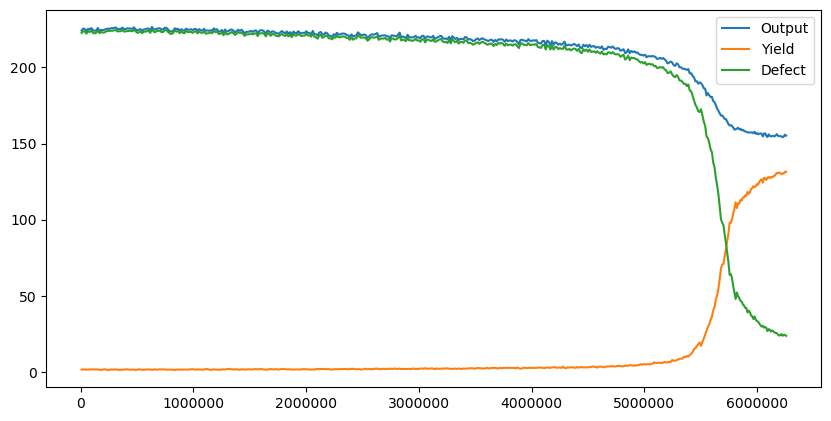

In [96]:
fname = "12"
data = load_json(fname)


data["test_defect_mean"] = [x - y for x, y in zip(data["test_output_mean"], data["test_yield_mean"])]


plt.figure(figsize=[10, 5], dpi=100)
plt.plot(data["test_output_mean_T"], data["test_output_mean"])
plt.plot(data["test_yield_mean_T"], data["test_yield_mean"])
plt.plot(data["test_yield_mean_T"], data["test_defect_mean"])
plt.legend(["Output", "Yield", "Defect"])
plt.show()

In [59]:
fname = "7"
data4 = load_json(fname)

fname = "11"
data5 = load_json(fname)

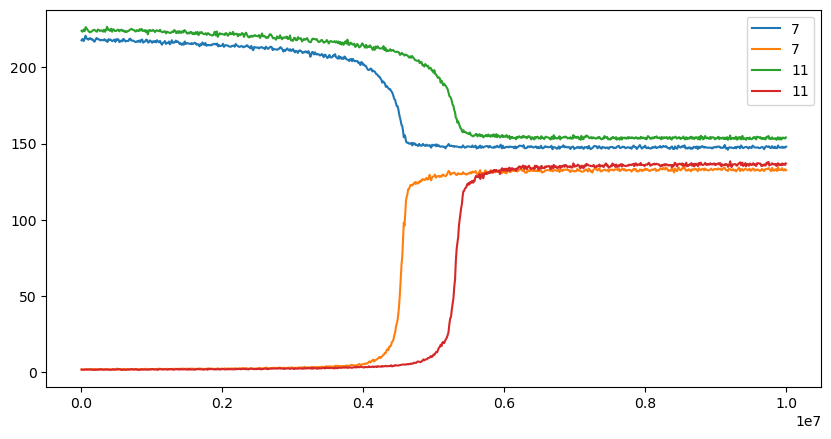

In [61]:
plt.figure(figsize=[10, 5], dpi=100)
plt.plot(data4["test_output_mean_T"], data4["test_output_mean"])
plt.plot(data4["test_yield_mean_T"], data4["test_yield_mean"])
plt.plot(data5["test_output_mean_T"], data5["test_output_mean"])
plt.plot(data5["test_yield_mean_T"], data5["test_yield_mean"])
plt.legend(["7", "7", "11", "11"])
plt.show()

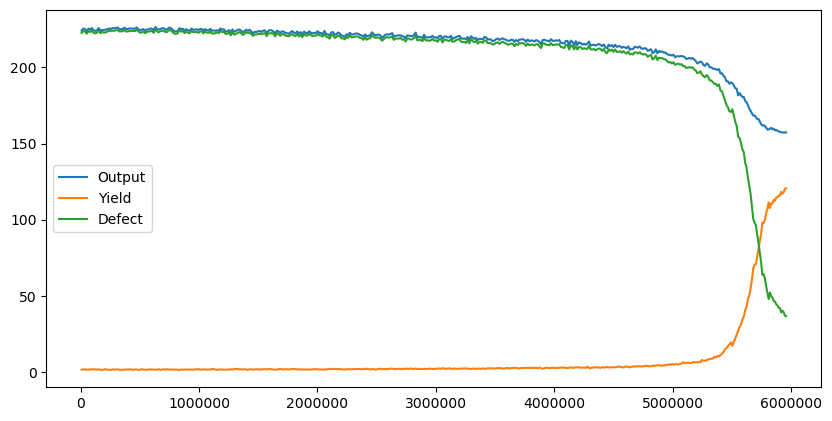

In [82]:

data["test_defect_mean"] = [x - y for x, y in zip(data["test_output_mean"], data["test_yield_mean"])]


plt.figure(figsize=[10, 5], dpi=100)
plt.plot(data["test_output_mean_T"], data["test_output_mean"])
plt.plot(data["test_yield_mean_T"], data["test_yield_mean"])
plt.plot(data["test_yield_mean_T"], data["test_defect_mean"])
plt.legend(["Output", "Yield", "Defect"])
plt.show()


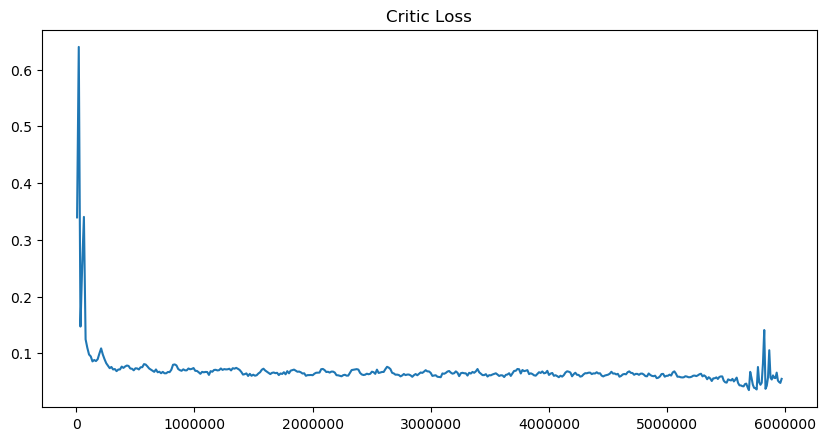

In [83]:
plt.figure(figsize=[10, 5], dpi=100)
plt.plot(data["critic_loss_T"], data["critic_loss"])
plt.title("Critic Loss")
plt.show()

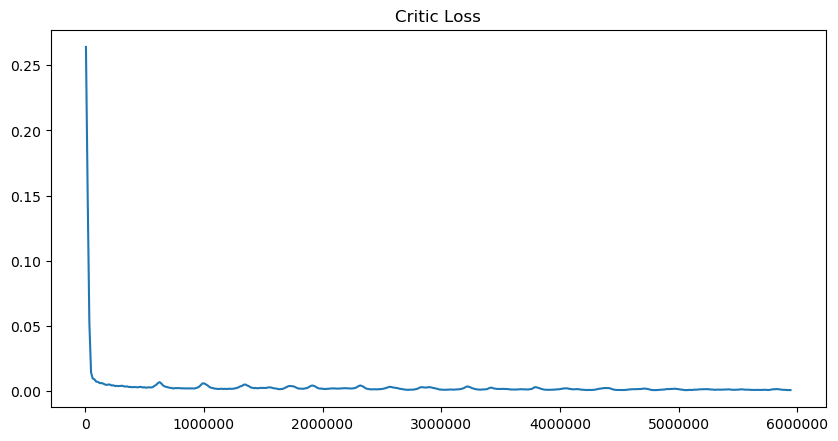

In [90]:
plt.figure(figsize=[10, 5], dpi=100)
plt.plot(data["critic_loss_T"], data["critic_loss"])
plt.title("Critic Loss")
plt.show()

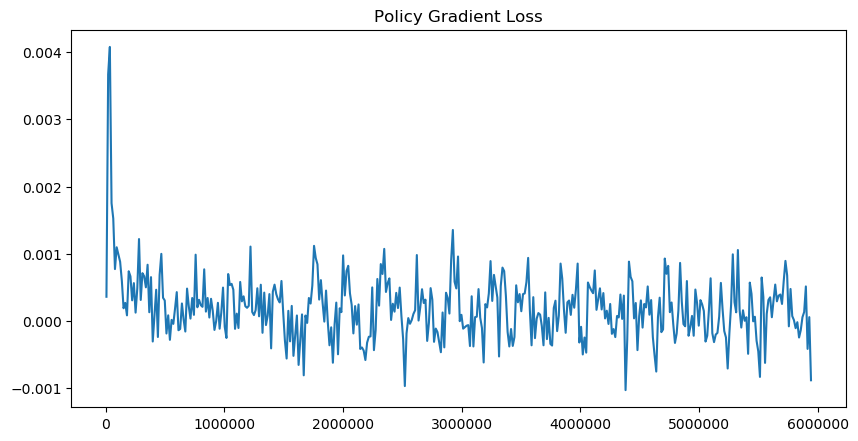

In [91]:
plt.figure(figsize=[10, 5], dpi=100)
plt.plot(data["pg_loss_T"], data["pg_loss"])
plt.title("Policy Gradient Loss")
plt.show()

In [92]:
data["return_mean"] = [x["value"] for x in data["return_mean"]]

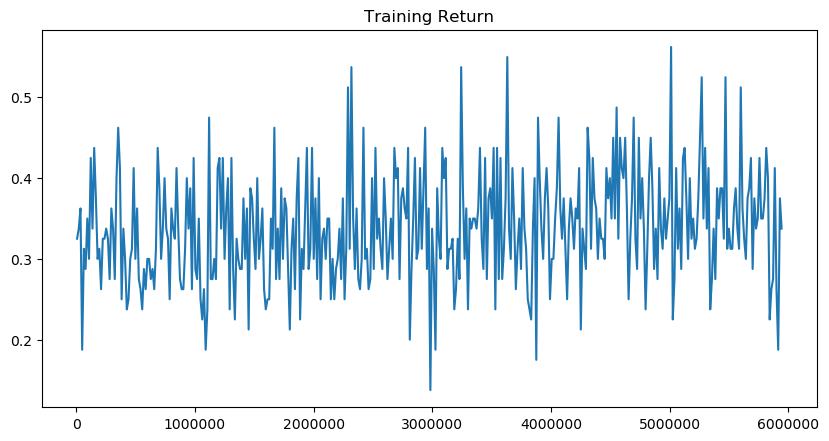

In [93]:
plt.figure(figsize=[10, 5], dpi=100)
plt.plot(data["return_mean_T"], data["return_mean"])
plt.title("Training Return")
plt.show()

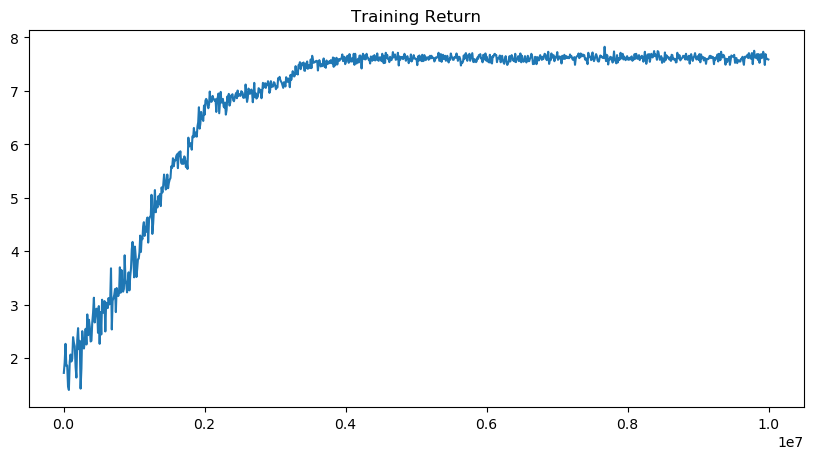

In [9]:
plt.figure(figsize=[10, 5], dpi=100)
plt.plot(data["return_mean_T"], data["return_mean"])
plt.title("Training Return")
plt.show()